 #  A Whale off the Port(folio)
 ---

 In this assignment, you'll get to use what you've learned this week to evaluate the performance among various algorithmic, hedge, and mutual fund portfolios and compare them against the S&P TSX 60 Index.

In [1]:
# Initial imports
import pandas as pd
import numpy as np
import datetime as dt
import seaborn as sns
from pathlib import Path

%matplotlib inline

# Data Cleaning

In this section, you will need to read the CSV files into DataFrames and perform any necessary data cleaning steps. After cleaning, combine all DataFrames into a single DataFrame.

Files:

* `whale_returns.csv`: Contains returns of some famous "whale" investors' portfolios.

* `algo_returns.csv`: Contains returns from the in-house trading algorithms from Harold's company.

* `sp_tsx_history.csv`: Contains historical closing prices of the S&P TSX 60 Index.

## Whale Returns

Read the Whale Portfolio daily returns and clean the data.

In [2]:
whale_csv = ("Starter_Code/Resources/whale_returns.csv")

In [3]:
# Reading whale returns
whale_df = pd.read_csv(whale_csv, parse_dates=True, infer_datetime_format=True, index_col="Date")
whale_df.head()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC
Date,,,,
2015-03-02,NaN,NaN,NaN,NaN
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569
2015-03-04,0.002230,0.003241,-0.002534,0.004213
2015-03-05,0.004016,0.004076,0.002355,0.006726
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098


In [4]:
# Count nulls
whale_df.isnull().sum()

SOROS FUND MANAGEMENT LLC      1
PAULSON & CO.INC.              1
TIGER GLOBAL MANAGEMENT LLC    1
BERKSHIRE HATHAWAY INC         1
dtype: int64

In [5]:
# Drop nulls
whale_df.dropna(inplace=True)
whale_df.isnull().sum()

SOROS FUND MANAGEMENT LLC      0
PAULSON & CO.INC.              0
TIGER GLOBAL MANAGEMENT LLC    0
BERKSHIRE HATHAWAY INC         0
dtype: int64

In [6]:
whale_df.dtypes

SOROS FUND MANAGEMENT LLC      float64
PAULSON & CO.INC.              float64
TIGER GLOBAL MANAGEMENT LLC    float64
BERKSHIRE HATHAWAY INC         float64
dtype: object

## Algorithmic Daily Returns

Read the algorithmic daily returns and clean the data.

In [7]:
algocsv = ("Starter_Code/Resources/algo_returns.csv")

In [8]:
# Reading algorithmic returns
algo_df = pd.read_csv(algocsv, parse_dates=True, infer_datetime_format=True, index_col="Date")
algo_df.head()

,Algo 1,Algo 2
Date,,
2014-05-28,0.001745,NaN
2014-05-29,0.003978,NaN
2014-05-30,0.004464,NaN
2014-06-02,0.005692,NaN
2014-06-03,0.005292,NaN


In [9]:
# Count nulls
algo_df.isnull().sum()

Algo 1    0
Algo 2    6
dtype: int64

In [10]:
# Drop nulls
algo_df.dropna(inplace=True)
algo_df.isnull().sum()

Algo 1    0
Algo 2    0
dtype: int64

In [11]:
algo_df.dtypes

Algo 1    float64
Algo 2    float64
dtype: object

## S&P TSX 60 Returns

Read the S&P TSX 60 historic closing prices and create a new daily returns DataFrame from the data. 

In [12]:
tsx_csv = ('Starter_Code/Resources/sp_tsx_history.csv')

In [13]:
# Reading S&P TSX 60 Closing Prices
tsx_df = pd.read_csv(tsx_csv, parse_dates=True, infer_datetime_format=True, index_col="Date")
tsx_df.head()

,Close
Date,
2012-10-01,"$12,370.19"
2012-10-02,"$12,391.23"
2012-10-03,"$12,359.47"
2012-10-04,"$12,447.68"
2012-10-05,"$12,418.99"


In [14]:
# Check Data Types
tsx_df.dtypes

Close    object
dtype: object

In [15]:
# Remove '$' sign and other characters and convert Data Types
tsx_df['Close'] = tsx_df['Close'].str.replace('$', "")
tsx_df['Close'] = tsx_df['Close'].str.replace(',', "")

tsx_df["Close"] = tsx_df["Close"].astype("float")
tsx_df.dtypes

tsx_df.head()

<ipython-input-15-8807c1c33bf2>:2: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will*not* be treated as literal strings when regex=True.
  tsx_df['Close'] = tsx_df['Close'].str.replace('$', "")


,Close
Date,
2012-10-01,12370.19
2012-10-02,12391.23
2012-10-03,12359.47
2012-10-04,12447.68
2012-10-05,12418.99


In [16]:
# Calculate Daily Returns
tsx_df['Close'] = tsx_df['Close'].pct_change()

In [17]:
# Drop nulls
tsx_df.dropna(inplace=True)

In [18]:
# Rename `Close` Column to be specific to this portfolio
tsx_df = tsx_df.rename(columns={'Close':"S&P/TSX60"})
tsx_df.isnull().sum()

S&P/TSX60    0
dtype: int64

## Combine Whale, Algorithmic, and S&P TSX 60 Returns

In [19]:
# Join Whale Returns, Algorithmic Returns, and the S&P TSX 60 Returns into a single DataFrame with columns for each portfolio's returns.
combined_returns = pd.concat(
    [whale_df, algo_df, tsx_df], axis="columns", join="inner"
)

combined_returns.head()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,S&P/TSX60
Date,,,,,,,
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569,-0.001942,-0.000949,-0.008530
2015-03-04,0.002230,0.003241,-0.002534,0.004213,-0.008589,0.002416,-0.003371
2015-03-05,0.004016,0.004076,0.002355,0.006726,-0.000955,0.004323,0.001344
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098,-0.004957,-0.011460,-0.009972
2015-03-09,0.000582,0.004225,0.005843,-0.001652,-0.005447,0.001303,-0.006555


---

# Conduct Quantitative Analysis

In this section, you will calculate and visualize performance and risk metrics for the portfolios.

## Performance Anlysis

#### Calculate and Plot the daily returns.

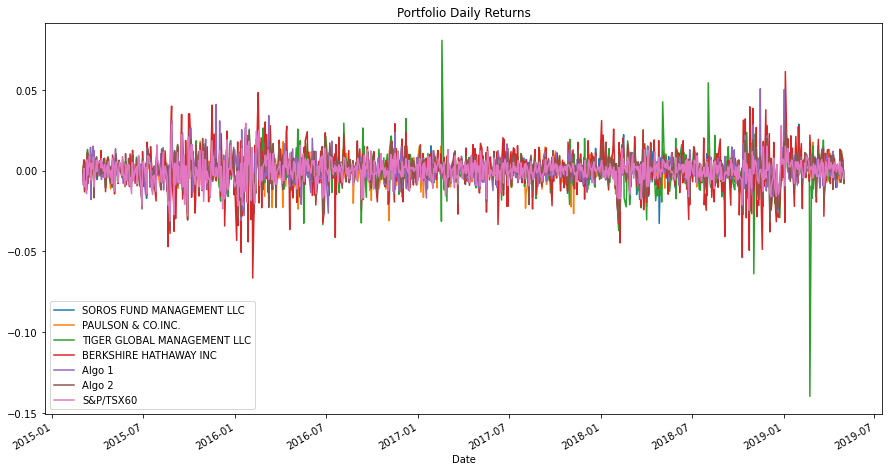

In [20]:
# Plot daily returns of all portfolios
combined_returns.plot(figsize=(15,8), title="Portfolio Daily Returns").legend(loc=3, prop={'size': 10})

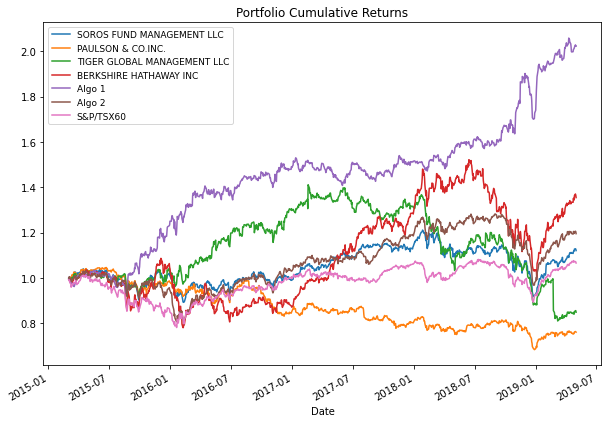

In [21]:
# Calculate cumulative returns of all portfolios
port_cumulative_returns = (1+combined_returns).cumprod()
# Plot cumulative returns
port_cumulative_returns.plot(figsize=(10,7), title="Portfolio Cumulative Returns").legend(loc=2, prop={'size': 9})

---

## Risk Analysis

Determine the _risk_ of each portfolio:

1. Create a box plot for each portfolio. 
2. Calculate the standard deviation for all portfolios.
4. Determine which portfolios are riskier than the S&P TSX 60.
5. Calculate the Annualized Standard Deviation.

### Create a box plot for each portfolio


<AxesSubplot:>

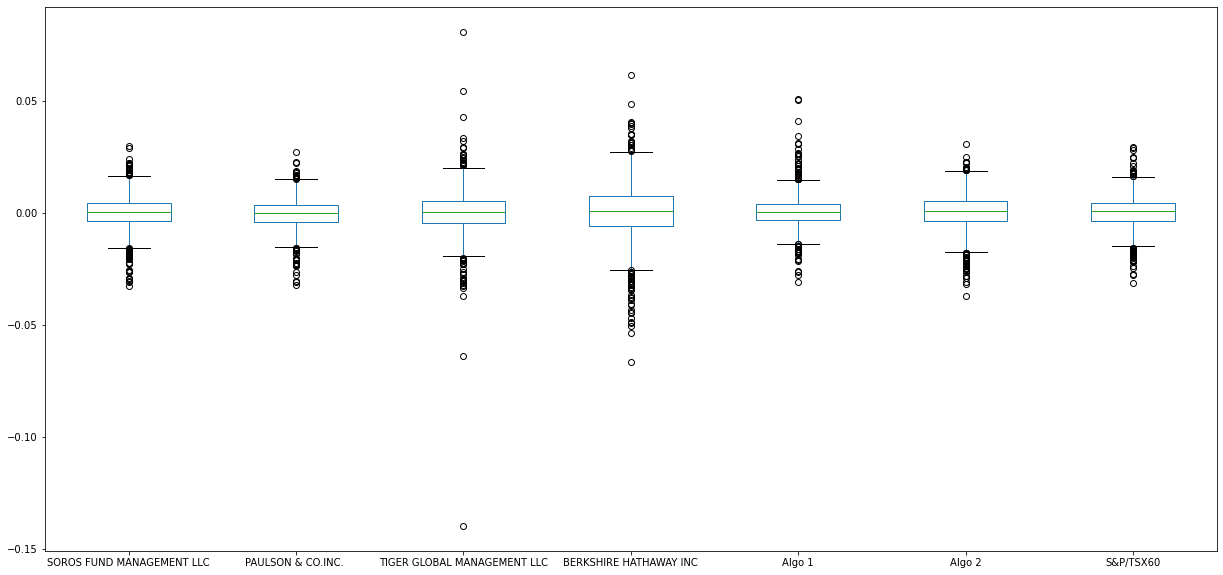

In [22]:
# Box plot to visually show risk
combined_returns.plot.box(figsize=(21,10))

### Calculate Standard Deviations

In [23]:
# Calculate the daily standard deviations of all portfolios
all_portfolio_std = combined_returns.std()
all_portfolio_std

SOROS FUND MANAGEMENT LLC      0.007828
PAULSON & CO.INC.              0.006982
TIGER GLOBAL MANAGEMENT LLC    0.010883
BERKSHIRE HATHAWAY INC         0.012826
Algo 1                         0.007589
Algo 2                         0.008326
S&P/TSX60                      0.007034
dtype: float64

### Determine which portfolios are riskier than the S&P TSX 60

In [24]:
# Calculate  the daily standard deviation of S&P TSX 60
tsx_std = combined_returns["S&P/TSX60"].std()
tsx_std

0.007034167748577725

In [25]:
# Create dataframe for all portfolios standard deviations
portfolio_std_df = pd.DataFrame(all_portfolio_std, columns=["Std"])
portfolio_std_df

,Std
SOROS FUND MANAGEMENT LLC,0.007828
PAULSON & CO.INC.,0.006982
TIGER GLOBAL MANAGEMENT LLC,0.010883
BERKSHIRE HATHAWAY INC,0.012826
Algo 1,0.007589
Algo 2,0.008326
S&P/TSX60,0.007034


In [26]:
# Determine which portfolios are riskier than the S&P TSX 60
tsx = portfolio_std_df.loc["S&P/TSX60", "Std"]
riskier_portfolio = portfolio_std_df[portfolio_std_df["Std"] > tsx]
riskier_portfolio

,Std
SOROS FUND MANAGEMENT LLC,0.007828
TIGER GLOBAL MANAGEMENT LLC,0.010883
BERKSHIRE HATHAWAY INC,0.012826
Algo 1,0.007589
Algo 2,0.008326


### Calculate the Annualized Standard Deviation

In [27]:
# Calculate the annualized standard deviation (252 trading days)
annual_std = all_portfolio_std * np.sqrt(252)
annual_std

SOROS FUND MANAGEMENT LLC      0.124259
PAULSON & CO.INC.              0.110841
TIGER GLOBAL MANAGEMENT LLC    0.172759
BERKSHIRE HATHAWAY INC         0.203599
Algo 1                         0.120470
Algo 2                         0.132177
S&P/TSX60                      0.111664
dtype: float64

---

## Rolling Statistics

Risk changes over time. Analyze the rolling statistics for Risk and Beta. 

1. Calculate and plot the rolling standard deviation for the S&P TSX 60 using a 21-day window.
2. Calculate the correlation between each stock to determine which portfolios may mimick the S&P TSX 60.
3. Choose one portfolio, then calculate and plot the 60-day rolling beta for it and the S&P TSX 60.

### Calculate and plot rolling `std` for all portfolios with 21-day window

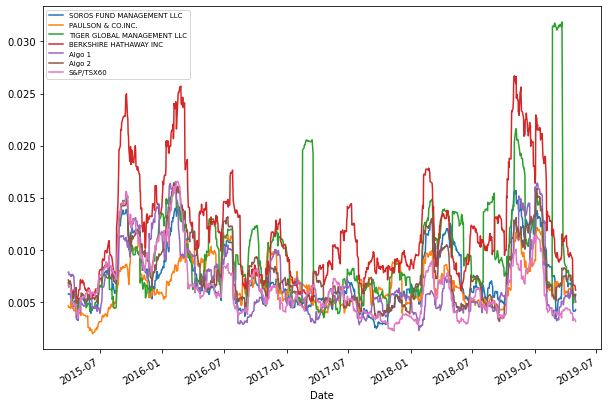

In [28]:
# Calculate the rolling standard deviation for all portfolios using a 21-day window
combined_21sma_std = combined_returns.rolling(window=21).std()
# Plot the rolling standard deviation
combined_21sma_std.plot(figsize=(10,7)).legend(loc=2, prop={'size': 7})

### Calculate and plot the correlation

In [29]:
# Calculate the correlation
portfolio_correlation = combined_returns.corr()
portfolio_correlation

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,S&P/TSX60
SOROS FUND MANAGEMENT LLC,1.000000,0.697076,0.560964,0.750181,0.313795,0.826667,0.673930
PAULSON & CO.INC.,0.697076,1.000000,0.433034,0.540033,0.266363,0.674015,0.486511
TIGER GLOBAL MANAGEMENT LLC,0.560964,0.433034,1.000000,0.423524,0.161236,0.506689,0.440583
BERKSHIRE HATHAWAY INC,0.750181,0.540033,0.423524,1.000000,0.289378,0.684609,0.557250
Algo 1,0.313795,0.266363,0.161236,0.289378,1.000000,0.285455,0.310276
Algo 2,0.826667,0.674015,0.506689,0.684609,0.285455,1.000000,0.737370
S&P/TSX60,0.673930,0.486511,0.440583,0.557250,0.310276,0.737370,1.000000


<AxesSubplot:>

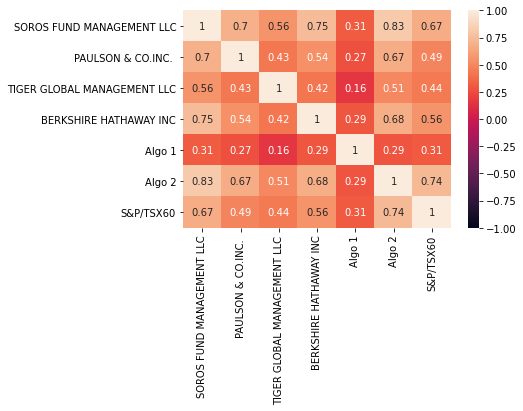

In [70]:
# Display the correlation matrix
sns.heatmap(portfolio_correlation, vmin=-1, vmax=1, annot=True)

The portfolio that is the most correlated to the S&P/TSX60 is Algo 2.
While the least correlated portfolio to the S&P/TSX60 is Algo 1.

### Calculate and Plot Beta for a chosen portfolio and the S&P 60 TSX

<AxesSubplot:title={'center':'60-Day Rolling Beta of Algo 1'}, xlabel='Date'>

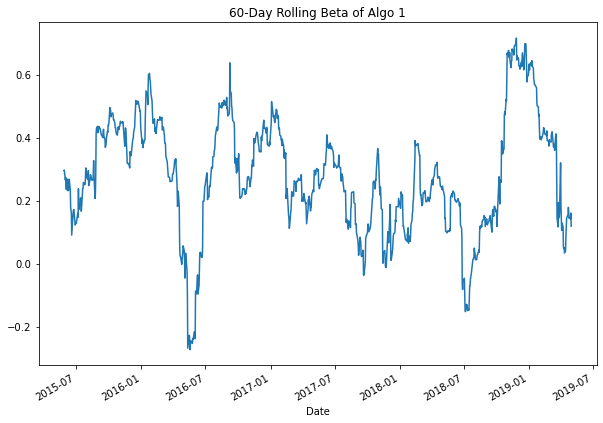

In [69]:
# Calculate covariance of a single portfolio
rolling_algo1_covariance = combined_returns["Algo 1"].rolling(window=60).cov(combined_returns["S&P/TSX60"])
# Calculate variance of S&P TSX
rolling_tsx_variance = combined_returns["S&P/TSX60"].rolling(60).var()
# Computing beta
rolling_beta = (rolling_algo1_covariance / rolling_tsx_variance)
# Plot beta trend
rolling_beta.plot(figsize=(10,7), title="60-Day Rolling Beta of Algo 1")

## Rolling Statistics Challenge: Exponentially Weighted Average 

An alternative way to calculate a rolling window is to take the exponentially weighted moving average. This is like a moving window average, but it assigns greater importance to more recent observations. Try calculating the [`ewm`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.ewm.html) with a 21-day half-life.

<AxesSubplot:xlabel='Date'>

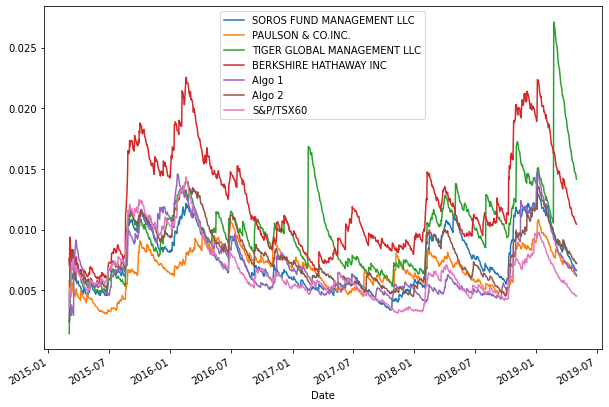

In [67]:
# Use `ewm` to calculate the rolling window
algo_21ema = combined_returns.ewm(halflife=21, adjust=True).std()
algo_21ema.plot(figsize=(10,7))

---

# Sharpe Ratios
In reality, investment managers and thier institutional investors look at the ratio of return-to-risk, and not just returns alone. After all, if you could invest in one of two portfolios, and each offered the same 10% return, yet one offered lower risk, you'd take that one, right?

### Using the daily returns, calculate and visualize the Sharpe ratios using a bar plot

In [54]:
# Annualized Sharpe Ratios
annual_avg_return = combined_returns.mean()*252
sharpe_ratio =  annual_avg_return / annual_std
annual_avg_return

SOROS FUND MANAGEMENT LLC      0.035626
PAULSON & CO.INC.             -0.060696
TIGER GLOBAL MANAGEMENT LLC   -0.024956
BERKSHIRE HATHAWAY INC         0.095090
Algo 1                         0.179682
Algo 2                         0.052450
S&P/TSX60                      0.021836
dtype: float64

<AxesSubplot:>

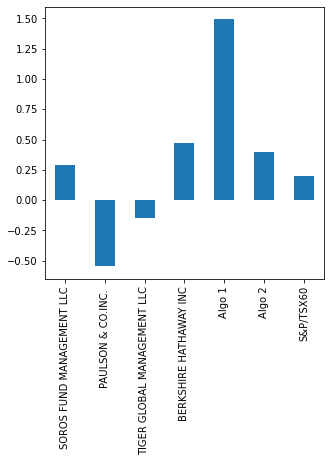

In [71]:
# Visualize the sharpe ratios as a bar plot
sharpe_ratio.plot(kind="bar", figsize=(5,5))

### Determine whether the algorithmic strategies outperform both the market (S&P TSX 60) and the whales portfolios.

Write your answer here!

In [76]:
all_portfolio_std

SOROS FUND MANAGEMENT LLC      0.007828
PAULSON & CO.INC.              0.006982
TIGER GLOBAL MANAGEMENT LLC    0.010883
BERKSHIRE HATHAWAY INC         0.012826
Algo 1                         0.007589
Algo 2                         0.008326
S&P/TSX60                      0.007034
dtype: float64

Based on the analysis, the algorithmic strategies both outperforms the S&P TSX 60. The algo strategies are riskier, with a standard deviation of 0.007589 and 0.008326 for Algo 1 and Algo 2, respectively, compared to the standard deviation of the market at 0.007034. Algo 1 in particular is the better algorithmic strategy because it outperforms Algo 2 in Annual Average Return. In fact, Algo 1's Annual Average Return outperforms every other portfolio. It has the highest Sharpe Ratio and doesn't carry as much risk as some of the Whale Porfolios. 

---

# Create Custom Portfolio

In this section, you will build your own portfolio of stocks, calculate the returns, and compare the results to the Whale Portfolios and the S&P TSX 60. 

1. Choose 3-5 custom stocks with at last 1 year's worth of historic prices and create a DataFrame of the closing prices and dates for each stock.
2. Calculate the weighted returns for the portfolio assuming an equal number of shares for each stock.
3. Join your portfolio returns to the DataFrame that contains all of the portfolio returns.
4. Re-run the performance and risk analysis with your portfolio to see how it compares to the others.
5. Include correlation analysis to determine which stocks (if any) are correlated.

## Choose 3-5 custom stocks with at last 1 year's worth of historic prices and create a DataFrame of the closing prices and dates for each stock.

For this demo solution, we fetch data from three companies listes in the S&P TSX 60 index.

* `SHOP` - [Shopify Inc](https://en.wikipedia.org/wiki/Shopify)

* `OTEX` - [Open Text Corporation](https://en.wikipedia.org/wiki/OpenText)

* `L` - [Loblaw Companies Limited](https://en.wikipedia.org/wiki/Loblaw_Companies)

In [35]:
# Reading data from 1st stock


In [36]:
# Reading data from 2nd stock


In [37]:
# Reading data from 3rd stock


In [38]:
# Combine all stocks in a single DataFrame


In [39]:
# Reset Date index


In [40]:
# Reorganize portfolio data by having a column per symbol


In [41]:
# Calculate daily returns

# Drop NAs

# Display sample data


## Calculate the weighted returns for the portfolio assuming an equal number of shares for each stock

In [42]:
# Set weights
weights = [1/3, 1/3, 1/3]

# Calculate portfolio return

# Display sample data


## Join your portfolio returns to the DataFrame that contains all of the portfolio returns

In [43]:
# Join your returns DataFrame to the original returns DataFrame


In [44]:
# Only compare dates where return data exists for all the stocks (drop NaNs)


## Re-run the risk analysis with your portfolio to see how it compares to the others

### Calculate the Annualized Standard Deviation

In [45]:
# Calculate the annualized `std`


### Calculate and plot rolling `std` with 21-day window

In [46]:
# Calculate rolling standard deviation

# Plot rolling standard deviation


### Calculate and plot the correlation

In [47]:
# Calculate and plot the correlation


### Calculate and Plot the 60-day Rolling Beta for Your Portfolio compared to the S&P 60 TSX

In [48]:
# Calculate and plot Beta


### Using the daily returns, calculate and visualize the Sharpe ratios using a bar plot

In [49]:
# Calculate Annualzied Sharpe Ratios


In [50]:
# Visualize the sharpe ratios as a bar plot


### How does your portfolio do?

Write your answer here!